In [5]:
import xarray as xr
import netCDF4
import yaml
import sys
import os



import numpy             as np
import xarray            as xr
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import matplotlib.cm     as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
def make_map(ncfile, pngfile, data, cmap, vext, title,showcolorbar=True):
    dpi = 150

    # Get lat, lon and cartopy_projection_object
    ds  = xr.open_dataset(ncfile)
    lat = ds.lat.values
    lon = ds.lon.values
    m   = ccrs.RotatedPole(ds.rotated_pole.grid_north_pole_longitude,
                           ds.rotated_pole.grid_north_pole_latitude)

    # Domain limites
    xll, yll = m.transform_point(lon[ 0,  0],lat[ 0,  0], ccrs.PlateCarree())
    xur, yur = m.transform_point(lon[-1, -1],lat[-1, -1], ccrs.PlateCarree())

    # Creating figure
    fig = plt.figure()
    fig.set_dpi(dpi)
    ax = plt.axes(projection=m)
    pc = ax.pcolormesh(lon, lat, data, cmap=cmap,vmin=vext[0], vmax=vext[1], transform=ccrs.PlateCarree())
    vext[0], vext[1] = pc.get_clim() # Useful when input was vext[0]=None and/or vext[1]=None

    # Domain limites
    xll, yll = m.transform_point(lon[ 0,  0],lat[ 0,  0], ccrs.PlateCarree())
    xur, yur = m.transform_point(lon[-1, -1],lat[-1, -1], ccrs.PlateCarree())
    ax.set_extent([xll, xur, yll, yur], crs=m)

    # Coastlines + political borders
    ax.coastlines()
    L0_country_ALL = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',scale='50m',facecolor='none')
    ax.add_feature(L0_country_ALL, edgecolor='black')

    # Title
    plt.title(title, fontsize=8)

    # Colorbar
    if showcolorbar == True:

        if   vext[0] ==  -vext[1]: extend = 'both'
        else                     : extend = 'neither'
        sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vext[0],vext[1]))
        sm._A = []
        plt.colorbar(sm,ax=ax, extend=extend)


#########################################################################
# Input arguments                                                       #
#########################################################################
working_dir = '/home/veilleux/Projet/Projet_SACHR/analyses_and_figures/'
yml_file = working_dir + 'config.yml'
stream = open(yml_file,'r')
config = yaml.safe_load(stream)

print(config['bukovsky'])

{'pampa': '/pampa/poitras/DATA/bukovsky/NetCDF/NAM11', 'Chinook_og': '/chinook/veilleux/DATA/Bukovsky/original', 'Chinook_rg': '/chinook/veilleux/DATA/Bukovsky/regrid'}


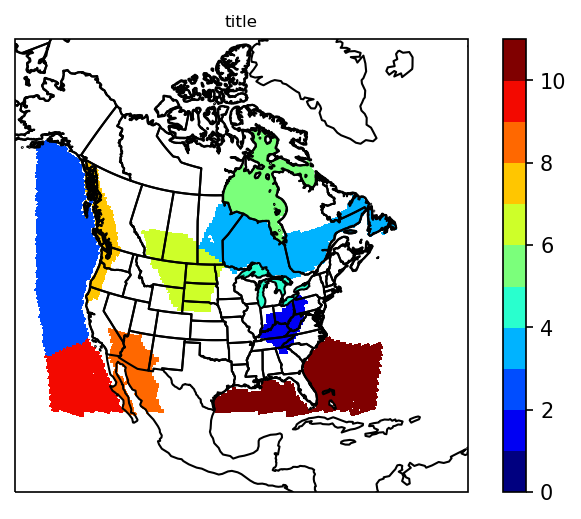

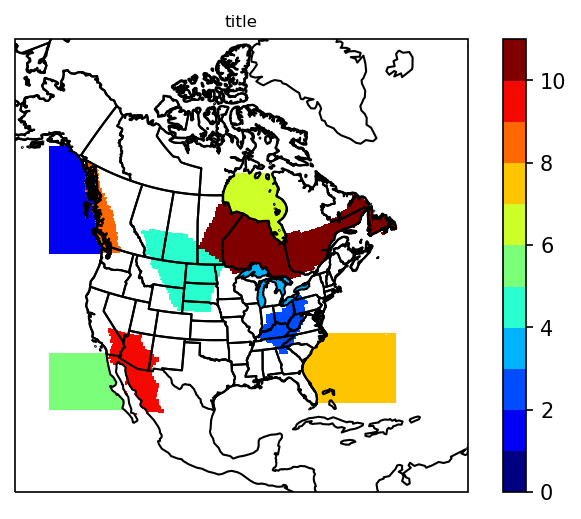

In [23]:
# Remap
remap     = config['bukovsky']['pampa'] + '/remap'
for i,ncfile in enumerate(os.listdir(remap)):
    
    if not 'mask' in ncfile:
        ds  = xr.open_dataset(remap + '/' + ncfile)
        m = np.squeeze(ds['mask'].values )
        if i == 0: mask = m
        else     : mask[~np.isnan(m)] = i+1
cmap = cm.get_cmap('jet',i+1)
make_map(remap + '/' +ncfile, 'x', mask, cmap, [0,i+1], 'title',showcolorbar=True)

# Final

final     = config['bukovsky']['pampa'] + '/final'
for i,ncfile in enumerate(os.listdir(final)):
    if not 'mask' in ncfile:
        ds  = xr.open_dataset(final + '/' + ncfile)
        m = np.squeeze(ds['mask'].values )
        if i == 0: mask = m
        else     : mask[~np.isnan(m)] = i+1
cmap = cm.get_cmap('jet',i+2)
make_map(final + '/' +ncfile, 'x', mask, cmap, [0,i+2], 'title',showcolorbar=True)


plt.show()